# Partie I: Analyse Exploratoire des données

## ========================================
## NOTEBOOK 1 : EXPLORATION DES DONNÉES (EDA)
## Projet Classification de CV - LiveCareer
## ========================================

### Exploration des Données - Classification de CV
 
#### **Objectif** : Analyser le dataset de CV pour comprendre :
##### - La structure des données
##### - La distribution des catégories
##### - Les caractéristiques du texte
##### - Identifier les patterns et insights

### 1. Imports et Configuration

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import warnings

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configuration des graphiques
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print(" Bibliothèques importées avec succès!")

 Bibliothèques importées avec succès!


### 2. Chargement des Données

In [4]:
# Charger le dataset
df = pd.read_csv('../data/raw/resume_dataset.csv')

print(f" Dataset chargé avec succès!")
print(f"   - Nombre de CV: {len(df)}")
print(f"   - Colonnes: {df.columns.tolist()}")

# Afficher les premières lignes
df.head()

 Dataset chargé avec succès!
   - Nombre de CV: 962
   - Colonnes: ['Category', 'Resume', 'cleaned_resume']


,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,NaN
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,NaN
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",NaN
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,NaN
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",NaN


### 3. Informations Générales

In [5]:
# Informations sur le dataset
print("="*60)
print(" INFORMATIONS GÉNÉRALES")
print("="*60)

print(f"\n Dimensions: {df.shape[0]} lignes × {df.shape[1]} colonnes")

print(f"\n Types de données:")
print(df.dtypes)

print(f"\n Valeurs manquantes:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print(" Aucune valeur manquante!")
else:
    print(missing[missing > 0])

print(f"\n Mémoire utilisée: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

 INFORMATIONS GÉNÉRALES

 Dimensions: 962 lignes × 3 colonnes

 Types de données:
Category           object
Resume             object
cleaned_resume    float64
dtype: object

 Valeurs manquantes:
cleaned_resume    962
dtype: int64

 Mémoire utilisée: 3.02 MB


In [6]:
# Statistiques descriptives
df.describe(include='all')

,Category,Resume,cleaned_resume
count,962,962,0.0
unique,25,166,NaN
top,Java Developer,"Technical Skills Web Technologies: Angular JS,...",NaN
freq,84,18,NaN
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN


### 4. Analyse de la Colonne Catégorie

In [7]:
# Identifier la colonne de catégorie
category_col = None
for col in ['Category', 'category', 'label', 'job_category']:
    if col in df.columns:
        category_col = col
        break

print(f" Colonne de catégorie: '{category_col}'")

# Distribution des catégories
category_counts = df[category_col].value_counts()

print(f"\n Nombre de catégories uniques: {df[category_col].nunique()}")
print(f"\n Distribution des catégories:")
print(category_counts)

 Colonne de catégorie: 'Category'

 Nombre de catégories uniques: 25

 Distribution des catégories:
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


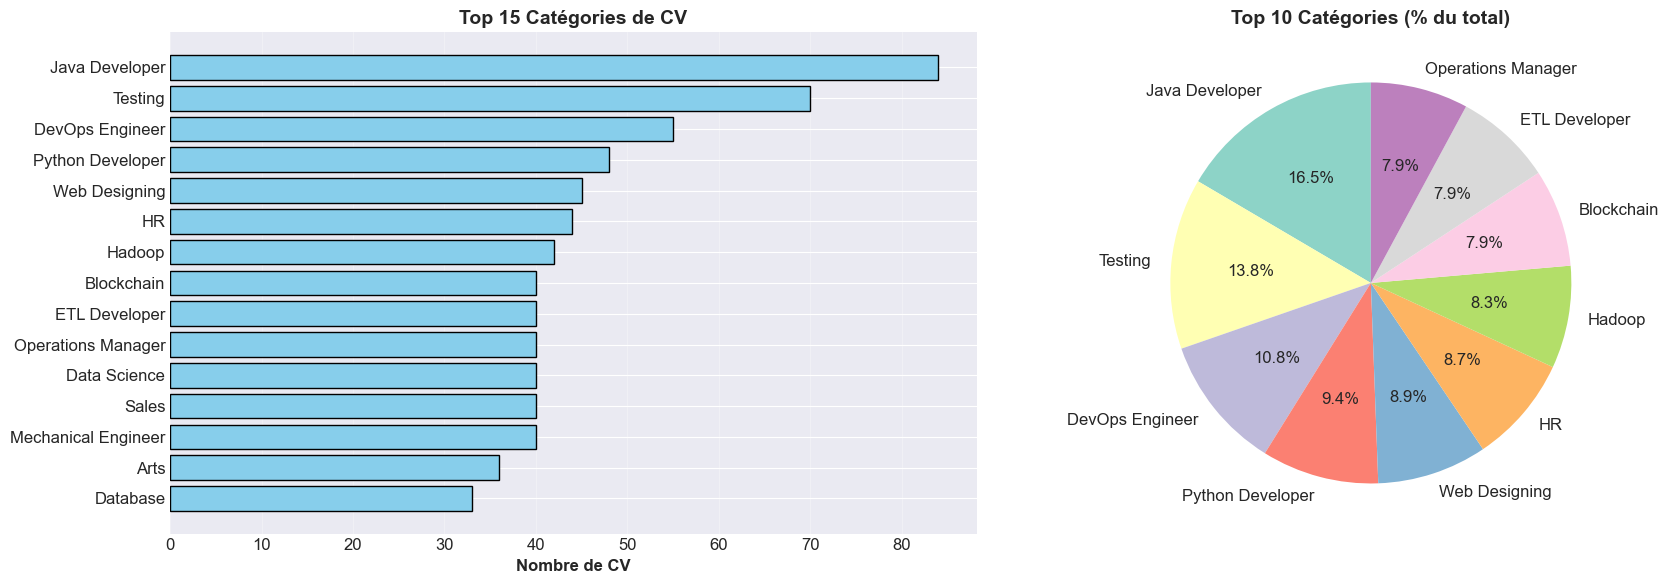

 Graphique sauvegardé dans outputs/plots/category_distribution.png


In [8]:
# Visualisation 1: Top 15 catégories
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Barplot horizontal
top_15 = category_counts.head(15)
axes[0].barh(range(len(top_15)), top_15.values, color='skyblue', edgecolor='black')
axes[0].set_yticks(range(len(top_15)))
axes[0].set_yticklabels(top_15.index)
axes[0].set_xlabel('Nombre de CV', fontsize=12, fontweight='bold')
axes[0].set_title('Top 15 Catégories de CV', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Inverser l'axe Y pour avoir la plus grande en haut
axes[0].invert_yaxis()

# Pie chart
top_10 = category_counts.head(10)
colors = plt.cm.Set3(range(len(top_10)))
axes[1].pie(top_10.values, labels=top_10.index, autopct='%1.1f%%', 
           colors=colors, startangle=90)
axes[1].set_title('Top 10 Catégories (% du total)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/plots/category_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Graphique sauvegardé dans outputs/plots/category_distribution.png")

In [9]:
# Statistiques sur les catégories
print("\n STATISTIQUES DES CATÉGORIES")
print("="*60)
print(f"Catégorie la plus fréquente: {category_counts.index[0]} ({category_counts.iloc[0]} CV)")
print(f"Catégorie la moins fréquente: {category_counts.index[-1]} ({category_counts.iloc[-1]} CV)")
print(f"Moyenne par catégorie: {category_counts.mean():.0f} CV")
print(f"Médiane par catégorie: {category_counts.median():.0f} CV")
print(f"Écart-type: {category_counts.std():.0f}")


 STATISTIQUES DES CATÉGORIES
Catégorie la plus fréquente: Java Developer (84 CV)
Catégorie la moins fréquente: Advocate (20 CV)
Moyenne par catégorie: 38 CV
Médiane par catégorie: 40 CV
Écart-type: 15


### 5. Analyse du Texte des CV

In [10]:
# Identifier la colonne de texte
text_col = None
for col in ['Resume', 'resume', 'text', 'resume_text']:
    if col in df.columns:
        text_col = col
        break

print(f" Colonne de texte: '{text_col}'")

 Colonne de texte: 'Resume'


In [11]:
# Calculer les longueurs
df['text_length'] = df[text_col].astype(str).apply(len)
df['word_count'] = df[text_col].astype(str).apply(lambda x: len(x.split()))

In [12]:
# Statistiques
print(f"\n STATISTIQUES DE LONGUEUR")
print("="*60)
print("\n Longueur en caractères:")
print(df['text_length'].describe())

print("\n Nombre de mots:")
print(df['word_count'].describe())


 STATISTIQUES DE LONGUEUR

 Longueur en caractères:
count      962.000000
mean      3160.364865
std       2886.528521
min        142.000000
25%       1217.250000
50%       2355.000000
75%       4073.750000
max      14816.000000
Name: text_length, dtype: float64

 Nombre de mots:
count     962.000000
mean      450.497921
std       415.868459
min        19.000000
25%       166.000000
50%       329.000000
75%       589.250000
max      2209.000000
Name: word_count, dtype: float64


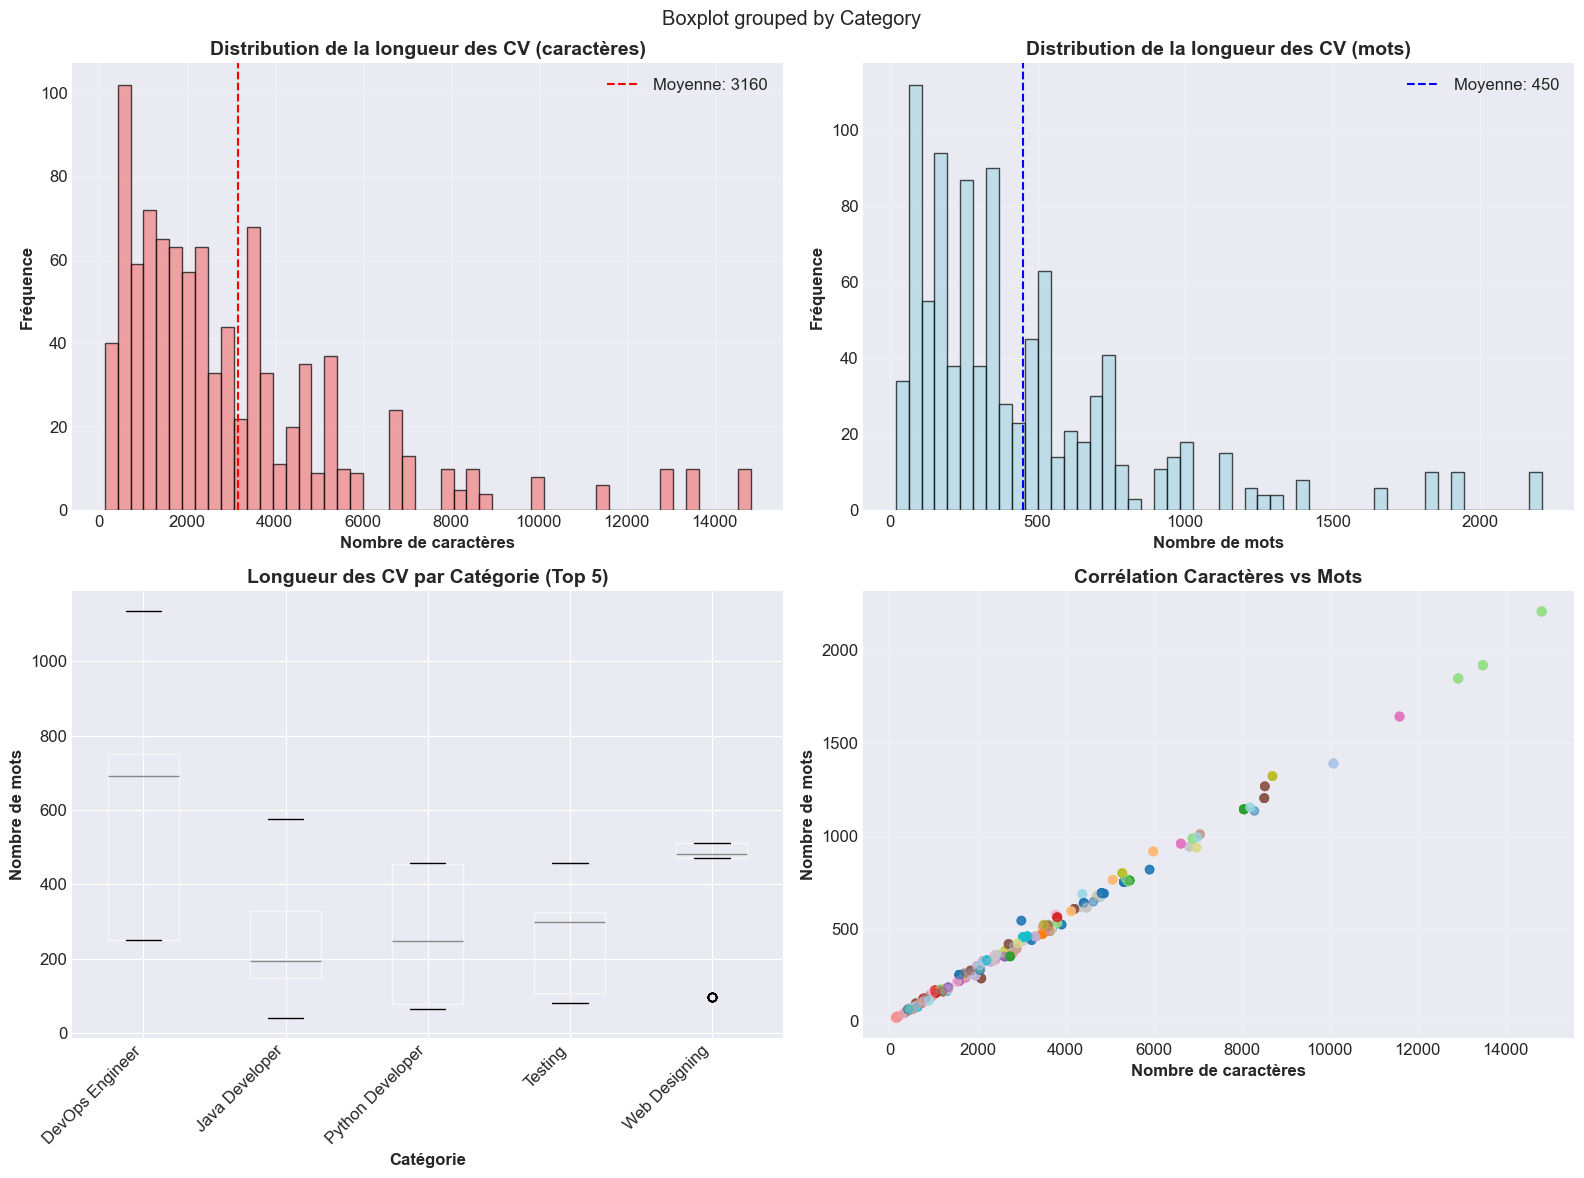

 Graphique sauvegardé dans outputs/plots/text_length_analysis.png


In [13]:
# Visualisation 2: Distribution des longueurs
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogramme caractères
axes[0, 0].hist(df['text_length'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Nombre de caractères', fontweight='bold')
axes[0, 0].set_ylabel('Fréquence', fontweight='bold')
axes[0, 0].set_title('Distribution de la longueur des CV (caractères)', fontsize=14, fontweight='bold')
axes[0, 0].axvline(df['text_length'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["text_length"].mean():.0f}')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Histogramme mots
axes[0, 1].hist(df['word_count'], bins=50, color='lightblue', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Nombre de mots', fontweight='bold')
axes[0, 1].set_ylabel('Fréquence', fontweight='bold')
axes[0, 1].set_title('Distribution de la longueur des CV (mots)', fontsize=14, fontweight='bold')
axes[0, 1].axvline(df['word_count'].mean(), color='blue', linestyle='--', label=f'Moyenne: {df["word_count"].mean():.0f}')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Boxplot par catégorie (top 5)
top_5_categories = category_counts.head(5).index
df_top5 = df[df[category_col].isin(top_5_categories)]
df_top5.boxplot(column='word_count', by=category_col, ax=axes[1, 0])
axes[1, 0].set_xlabel('Catégorie', fontweight='bold')
axes[1, 0].set_ylabel('Nombre de mots', fontweight='bold')
axes[1, 0].set_title('Longueur des CV par Catégorie (Top 5)', fontsize=14, fontweight='bold')
plt.sca(axes[1, 0])
plt.xticks(rotation=45, ha='right')

# Scatter plot
sample_df = df.sample(min(1000, len(df)))  # Échantillon pour la lisibilité
scatter = axes[1, 1].scatter(sample_df['text_length'], sample_df['word_count'], 
                            c=sample_df[category_col].factorize()[0], 
                            alpha=0.5, cmap='tab20')
axes[1, 1].set_xlabel('Nombre de caractères', fontweight='bold')
axes[1, 1].set_ylabel('Nombre de mots', fontweight='bold')
axes[1, 1].set_title('Corrélation Caractères vs Mots', fontsize=14, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/plots/text_length_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Graphique sauvegardé dans outputs/plots/text_length_analysis.png")

### 6. Analyse des Mots Fréquents

In [14]:
# Extraire tous les mots
all_text = ' '.join(df[text_col].astype(str).values)
all_words = all_text.lower().split()

# Mots les plus fréquents
word_freq = Counter(all_words)
most_common = word_freq.most_common(30)

print("\n TOP 30 MOTS LES PLUS FRÉQUENTS")
print("="*60)
for i, (word, count) in enumerate(most_common, 1):
    print(f"{i:2d}. {word:20s} : {count:6d}")


 TOP 30 MOTS LES PLUS FRÉQUENTS
 1. and                  :  16680
 2. â¢                  :  12213
 3. the                  :  11442
 4. -                    :  10929
 5. of                   :   8759
 6. to                   :   7588
 7. in                   :   5514
 8. for                  :   5235
 9. exprience            :   3829
10. with                 :   3797
11. &                    :   3650
12. company              :   3336
13. months               :   3182
14. details              :   3051
15. project              :   2989
16. description          :   2692
17. on                   :   2673
18. a                    :   2351
19. as                   :   2295
20. data                 :   1940
21. is                   :   1585
22. team                 :   1582
23. management           :   1414
24. 1                    :   1402
25. maharashtra          :   1356
26. year                 :   1272
27. from                 :   1263
28. 6                    :   1246
29. all        

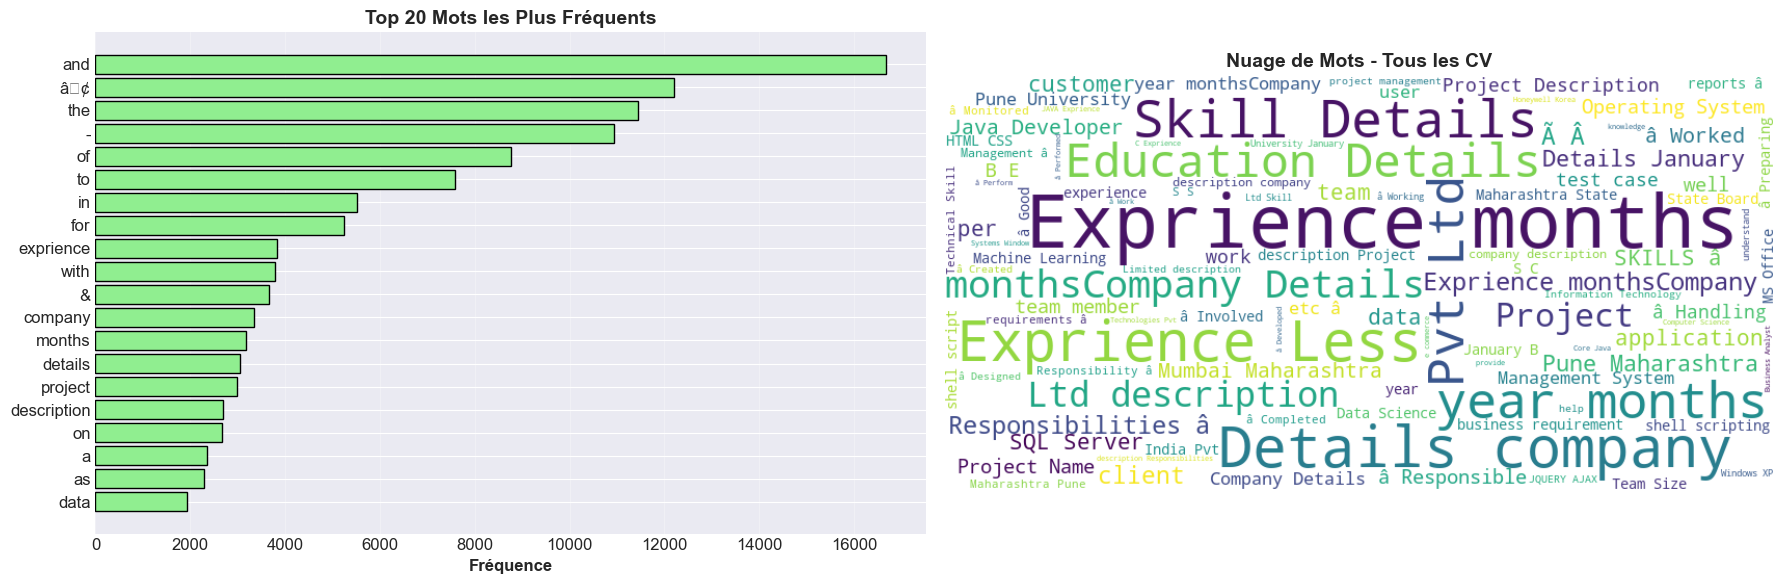

 Graphique sauvegardé dans outputs/plots/word_frequency.png


In [15]:
# Visualisation 3: Mots fréquents
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Barplot
words, counts = zip(*most_common[:20])
axes[0].barh(range(len(words)), counts, color='lightgreen', edgecolor='black')
axes[0].set_yticks(range(len(words)))
axes[0].set_yticklabels(words)
axes[0].set_xlabel('Fréquence', fontweight='bold')
axes[0].set_title('Top 20 Mots les Plus Fréquents', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# WordCloud
wordcloud = WordCloud(width=800, height=400, 
                     background_color='white',
                     colormap='viridis',
                     max_words=100).generate(all_text)

axes[1].imshow(wordcloud, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Nuage de Mots - Tous les CV', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/plots/word_frequency.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Graphique sauvegardé dans outputs/plots/word_frequency.png")

### 7. Analyse par Catégorie

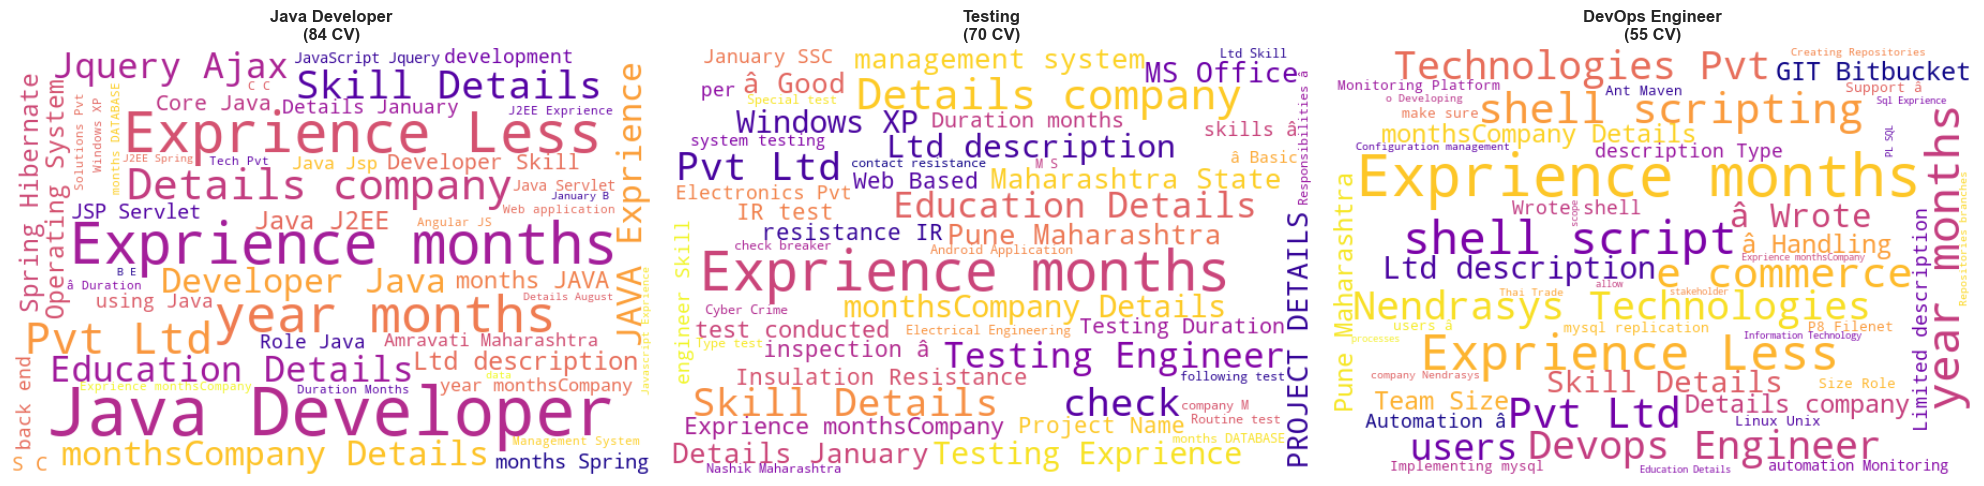

 Graphique sauvegardé dans outputs/plots/wordcloud_by_category.png


In [16]:
# WordCloud par catégorie (top 3 catégories)
top_3_categories = category_counts.head(3).index

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, category in enumerate(top_3_categories):
    category_text = ' '.join(df[df[category_col] == category][text_col].astype(str).values)
    
    wordcloud = WordCloud(width=600, height=400,
                         background_color='white',
                         colormap='plasma',
                         max_words=50).generate(category_text)
    
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f'{category}\n({category_counts[category]} CV)', 
                     fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/plots/wordcloud_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Graphique sauvegardé dans outputs/plots/wordcloud_by_category.png")

### 8. Vérification de l'Équilibre des Classes

In [17]:
# Calculer l'équilibre
balance_ratio = category_counts.max() / category_counts.min()

print("\n ÉQUILIBRE DES CLASSES")
print("="*60)
print(f"Ratio max/min: {balance_ratio:.2f}")

if balance_ratio > 10:
    print(" Dataset fortement déséquilibré! Considérer:")
    print("   - Oversampling (SMOTE)")
    print("   - Undersampling")
    print("   - Class weights dans les modèles")
elif balance_ratio > 3:
    print(" Dataset modérément déséquilibré")
    print("   - Utiliser class_weight='balanced' dans les modèles")
else:
    print(" Dataset relativement équilibré")


 ÉQUILIBRE DES CLASSES
Ratio max/min: 4.20
 Dataset modérément déséquilibré
   - Utiliser class_weight='balanced' dans les modèles


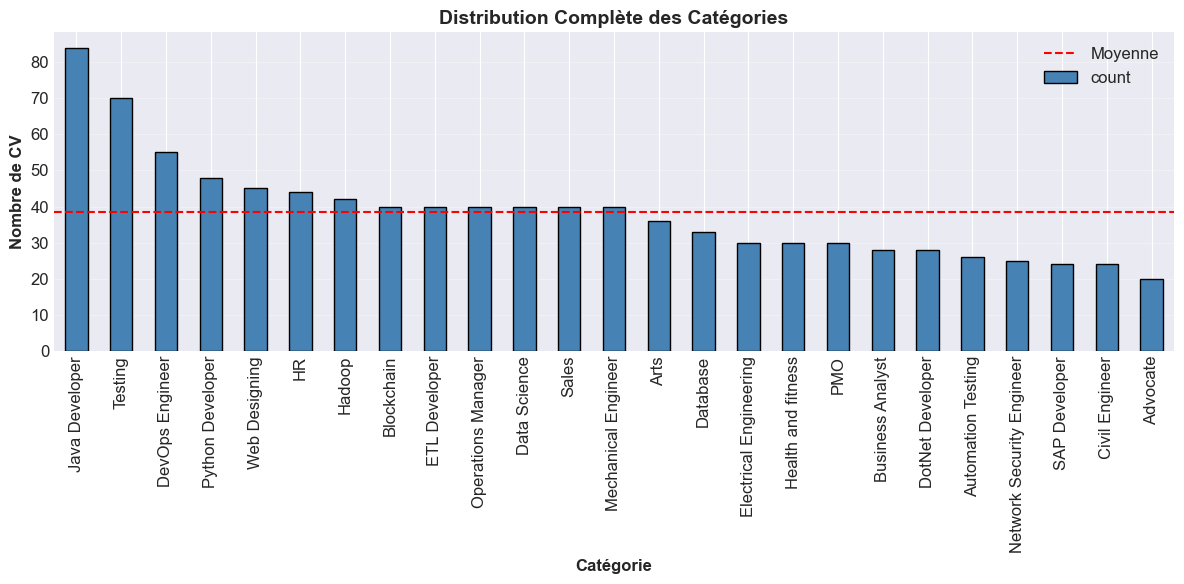

 Graphique sauvegardé dans outputs/plots/class_balance.png


In [18]:
# Visualiser l'équilibre
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.axhline(category_counts.mean(), color='red', linestyle='--', label='Moyenne')
plt.xlabel('Catégorie', fontweight='bold')
plt.ylabel('Nombre de CV', fontweight='bold')
plt.title('Distribution Complète des Catégories', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/plots/class_balance.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Graphique sauvegardé dans outputs/plots/class_balance.png")

### 9. Exemple de CV par Catégorie

In [19]:
# Afficher un exemple de CV pour chaque top 5 catégories
print("\n EXEMPLES DE CV PAR CATÉGORIE")
print("="*80)

for category in category_counts.head(3).index:
    sample_cv = df[df[category_col] == category].iloc[0]
    
    print(f"\n{'='*80}")
    print(f"CATÉGORIE: {category}")
    print(f"{'='*80}")
    print(f"\nTexte (500 premiers caractères):")
    print(sample_cv[text_col][:500] + "...")
    print(f"\nLongueur totale: {len(sample_cv[text_col])} caractères")


 EXEMPLES DE CV PAR CATÉGORIE

CATÉGORIE: Java Developer

Texte (500 premiers caractères):
Education Details 
August 2010 to May 2017 BE Electronics & Communication Jabalpur, Madhya Pradesh Takshshila institute of technology
Java developer 


Skill Details 
Java, Javascript,- Exprience - 6 monthsCompany Details 
company - Wab It Softwere Pvt.  Ltd.
description - Jr. Java Developer...

Longueur totale: 300 caractères

CATÉGORIE: Testing

Texte (500 premiers caractères):
â¢ Good logical and analytical skills â¢ Positive attitude towards solving problems and accepting challenges â¢ A team player & leader â¢ A good organizer PRESONAL DETAILS: DOB: 20/07/1995. Marital status: Single.Education Details 
July 2015 to June 2018 BE Electrical Pune, Maharashtra Sinhagad institute of technology
January 2012 DIPLOMA MSBTE Kopargaon, MAHARASHTRA, IN K.B.P.Polytechnic
January 2010 SSC S.G.Vidyalaya  state board
Testing Engineer 

Electrical engineer
Skill Details ...

Longueur totale: 618 caract

### 10. Résumé et Insights Clés

In [20]:
print("\n" + "="*80)
print(" RÉSUMÉ DE L'EXPLORATION DES DONNÉES")
print("="*80)

print(f"""
 DONNÉES GÉNÉRALES:
   - Nombre total de CV: {len(df)}
   - Nombre de catégories: {df[category_col].nunique()}
   - Colonnes: {df.columns.tolist()}
   - Valeurs manquantes: {"Non" if df.isnull().sum().sum() == 0 else "Oui"}

 CARACTÉRISTIQUES DU TEXTE:
   - Longueur moyenne: {df['text_length'].mean():.0f} caractères ({df['word_count'].mean():.0f} mots)
   - Longueur min: {df['text_length'].min()} caractères
   - Longueur max: {df['text_length'].max()} caractères

 DISTRIBUTION DES CATÉGORIES:
   - Catégorie dominante: {category_counts.index[0]} ({category_counts.iloc[0]} CV)
   - Catégorie la moins représentée: {category_counts.index[-1]} ({category_counts.iloc[-1]} CV)
   - Ratio déséquilibre: {balance_ratio:.2f}

 PROCHAINES ÉTAPES:
   1. Prétraitement du texte (nettoyage, normalisation)
   2. Feature extraction (TF-IDF, Word2Vec)
   3. Gestion du déséquilibre si nécessaire
   4. Entraînement des modèles de classification
""")



 RÉSUMÉ DE L'EXPLORATION DES DONNÉES

 DONNÉES GÉNÉRALES:
   - Nombre total de CV: 962
   - Nombre de catégories: 25
   - Colonnes: ['Category', 'Resume', 'cleaned_resume', 'text_length', 'word_count']
   - Valeurs manquantes: Oui

 CARACTÉRISTIQUES DU TEXTE:
   - Longueur moyenne: 3160 caractères (450 mots)
   - Longueur min: 142 caractères
   - Longueur max: 14816 caractères

 DISTRIBUTION DES CATÉGORIES:
   - Catégorie dominante: Java Developer (84 CV)
   - Catégorie la moins représentée: Advocate (20 CV)
   - Ratio déséquilibre: 4.20

 PROCHAINES ÉTAPES:
   1. Prétraitement du texte (nettoyage, normalisation)
   2. Feature extraction (TF-IDF, Word2Vec)
   3. Gestion du déséquilibre si nécessaire
   4. Entraînement des modèles de classification



### 11. Sauvegarde des Statistiques

In [21]:
# Créer un rapport récapitulatif
summary_stats = {
    'total_cv': len(df),
    'n_categories': df[category_col].nunique(),
    'avg_length_chars': df['text_length'].mean(),
    'avg_length_words': df['word_count'].mean(),
    'most_common_category': category_counts.index[0],
    'least_common_category': category_counts.index[-1],
    'class_imbalance_ratio': balance_ratio
}

# Sauvegarder en JSON
import json
with open('../outputs/eda_summary.json', 'w') as f:
    json.dump(summary_stats, f, indent=2)

print(" Statistiques sauvegardées dans outputs/eda_summary.json")

# Sauvegarder le DataFrame avec les nouvelles colonnes
df.to_csv('../data/processed/resume_with_stats.csv', index=False)
print(" DataFrame enrichi sauvegardé dans data/processed/resume_with_stats.csv")

 Statistiques sauvegardées dans outputs/eda_summary.json
 DataFrame enrichi sauvegardé dans data/processed/resume_with_stats.csv


###  ----------------------------------------------------------
####  FIN DE L'EXPLORATION

#### **Conclusions** :
##### - Dataset prêt pour le prétraitement
##### - Insights clés identifiés
##### - Visualisations créées
##### - Prochaine étape : Nettoyage du texte (Notebook 02)